In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_sensing=pd.read_csv(r"D:\PycharmProjects\fds_final\dataset\sensing\sensing.csv")
df_sensing_inc_andios=pd.read_csv(r"D:\PycharmProjects\fds_final\dataset\sensing\sensing.csv")
df_datadict=pd.read_csv(r"D:\PycharmProjects\fds_final\dataset\sensing\Data Dictionary (Daily).csv")
df_phq=pd.read_csv(r"D:\PycharmProjects\fds_final\dataset\EMA\general_ema.csv")
df_demog=pd.read_csv(r"D:\PycharmProjects\fds_final\dataset\Demographics\demographics.csv")

In [5]:
# Maksimum kolon sayısını artır
pd.set_option('display.max_columns', None)

# Maksimum satır sayısını artır
pd.set_option('display.max_rows', None)

# Ekran genişliğini artır
pd.set_option('display.width', 1000)

# Ondalık basamağı ayarlamak (örneğin 3 basamağa kadar)
pd.set_option('display.float_format', '{:.3f}'.format)

In [6]:
# 1. **Demographics Verisi İşlemleri**
print("Demographics verisi ilk 5 satır:")
print(df_demog.head())

# Eksik değerlerin kontrolü
print("\nDemographics verisindeki eksik değerler:")
print(df_demog.isnull().sum())

duplicates = df_demog[df_demog.duplicated()]
print(f"Tekrar eden satır sayısı: {len(duplicates)}")

Demographics verisi ilk 5 satır:
                                uid gender   race
0  3569e2f520db9014b4acc4227a6421c1   both  white
1  ac70fe1f8115ac361f2023269c011c3e      M  asian
2  3bb377ba0acb7d8916010184df36aa57      F  white
3  fa394f6d3d077bd5568fc3bc01580806      F  white
4  84120765740b5395aa49a2feb12fbb43      M  asian

Demographics verisindeki eksik değerler:
uid       0
gender    0
race      0
dtype: int64
Tekrar eden satır sayısı: 0


In [7]:
# 2. **Sensing Verisi İşlemleri**
print("\nSensing verisi ilk 5 satır:")
print(df_sensing.head())

# Eksik değerlerin kontrolü
print("\nSensing verisindeki eksik değerler:")
print(df_sensing.isnull().sum())
print(df_sensing.isnull().sum())
print("\nSensing verisindeki tekrar eden satırlar:")
print(df_sensing.duplicated().sum())  # Tekrar eden satırların sayısını göster


Sensing verisi ilk 5 satır:
                                uid  is_ios       day  act_in_vehicle_ep_0  act_in_vehicle_ep_1  act_in_vehicle_ep_2  act_in_vehicle_ep_3  act_in_vehicle_hr_0  act_in_vehicle_hr_1  act_in_vehicle_hr_10  act_in_vehicle_hr_11  act_in_vehicle_hr_12  act_in_vehicle_hr_13  act_in_vehicle_hr_14  act_in_vehicle_hr_15  act_in_vehicle_hr_16  act_in_vehicle_hr_17  act_in_vehicle_hr_18  act_in_vehicle_hr_19  act_in_vehicle_hr_2  act_in_vehicle_hr_20  act_in_vehicle_hr_21  act_in_vehicle_hr_22  act_in_vehicle_hr_23  act_in_vehicle_hr_3  act_in_vehicle_hr_4  act_in_vehicle_hr_5  act_in_vehicle_hr_6  act_in_vehicle_hr_7  act_in_vehicle_hr_8  act_in_vehicle_hr_9  act_on_bike_ep_0  act_on_bike_ep_1  act_on_bike_ep_2  act_on_bike_ep_3  act_on_bike_hr_0  act_on_bike_hr_1  act_on_bike_hr_10  act_on_bike_hr_11  act_on_bike_hr_12  act_on_bike_hr_13  act_on_bike_hr_14  act_on_bike_hr_15  act_on_bike_hr_16  act_on_bike_hr_17  act_on_bike_hr_18  act_on_bike_hr_19  act_on_bike_hr_2

In [8]:
 #3. **Data Dictionary (df_dic) İşlemleri**
print("\nData Dictionary verisi ilk 5 satır:")
print(df_datadict.head())


Data Dictionary verisi ilk 5 satır:
              Variable Feature Availability -- Android/iOS/All                                         Description      Variable Unit Time Period
0                  uid                                      All                                     Unique user ID                NaN         NaN
1               is_ios                                      All  Boolean indicating whether the user is an iOS ...  0 or 1 -- no unit         NaN
2                  day                                      All                        Date in the format YYYYMMDD                NaN         NaN
3  act_in_vehicle_ep_0                                      All                       Activity duration in vehicle            seconds    full day
4  act_in_vehicle_ep_1                                      All                       Activity duration in vehicle            seconds    12am-9am


In [9]:
df_phq.columns

Index(['uid', 'day', 'pam', 'phq4-1', 'phq4-2', 'phq4-3', 'phq4-4', 'phq4_resp_mean', 'phq4_resp_median', 'phq4_score', 'social_level', 'sse3-1', 'sse3-2', 'sse3-3', 'sse3-4', 'sse3_resp_mean', 'sse3_resp_median', 'stress', 'avg_ema_spent_time'], dtype='object')

In [10]:

# Depresyon skorunu hesapla
df_phq['depression_score'] = df_phq['phq4-3'] + df_phq['phq4-4'] 

In [11]:
df_phq_o=df_phq.copy()

In [12]:
# 4. **EMA Verisi İşlemleri**
print("\nEMA verisi ilk 5 satır:")
print(df_phq.head())

df_phq=df_phq[['uid','day','depression_score']]

# Eksik değerlerin kontrolü
print("\nEMA verisindeki eksik değerler:")
print(df_phq.isnull().sum())

print("\nEMA verisindeki tekrar eden satırlar:")
print(df_phq.duplicated().sum())  # Tekrar eden satırların sayısını göster


EMA verisi ilk 5 satır:
                                uid       day   pam  phq4-1  phq4-2  phq4-3  phq4-4  phq4_resp_mean  phq4_resp_median  phq4_score  social_level  sse3-1  sse3-2  sse3-3  sse3-4  sse3_resp_mean  sse3_resp_median  stress  avg_ema_spent_time  depression_score
0  1ff6d7f34acb354430e7323a35ff7703  20170907 7.000   2.000   2.000   2.000   1.000           4.494             4.409       7.000         4.000   1.000   3.000   3.000   3.000           2.996             2.989   1.000              37.386             3.000
1  1ff6d7f34acb354430e7323a35ff7703  20170908 3.000   1.000   1.000   1.000   1.000           4.635             3.843       4.000         2.000   2.000   3.000   3.000   3.000           6.341             6.721   4.000              52.117             2.000
2  1ff6d7f34acb354430e7323a35ff7703  20170909   NaN     NaN     NaN     NaN     NaN             NaN               NaN         NaN           NaN     NaN     NaN     NaN     NaN             NaN               N

In [13]:
# 'hr' içeren sütunları filtreleme
#df_sensing = df_sensing.drop(columns=df_sensing.filter(like="_hr_").columns)



2020 öncesindeki verileri al

In [14]:
df_phq = df_phq[df_phq['day'] < 20200101]
df_phq = df_phq.dropna()


In [15]:
df_sensing = df_sensing[df_sensing['day'] < 20200101]


199 kullanıcının ios kullanırken 35 kullanıcı android kullanıyor ve sütunlarımızda 

In [16]:
available_features=df_datadict[df_datadict['Feature Availability -- Android/iOS/All '] == 'All']['Variable']


In [17]:
df_sensing=df_sensing[available_features]

kullanıcı ve gün olarak eşleşmeyen satır kontrolü

In [18]:
phq_dates_per_user = df_phq.groupby('uid')['day'].apply(set)
sensing_dates_per_user = df_sensing.groupby('uid')['day'].apply(set)

for uid in phq_dates_per_user.index.intersection(sensing_dates_per_user.index):
    phq_dates = phq_dates_per_user[uid]
    sensing_dates = sensing_dates_per_user[uid]

    if phq_dates != sensing_dates:  # Eğer tarih setleri eşleşmiyorsa
        print(f"UID {uid}: Tarihler uyumsuz!")
        print(f"PHQ Tarihler: {phq_dates}")
        print(f"Sensing Tarihler: {sensing_dates}")
    else:
        print(f"UID {uid}: Tarihler uyumlu.")

UID 003df5deff30e1e5a07b5d063fe85c3f: Tarihler uyumsuz!
PHQ Tarihler: {20190210, 20190724, 20190729, 20181004, 20190223, 20190225, 20181010, 20180501, 20181015, 20181019, 20180511, 20181023, 20180517, 20181029, 20180521, 20180529, 20190804, 20190303, 20190817, 20190819, 20190827, 20190316, 20190317, 20181110, 20181113, 20190329, 20180606, 20181118, 20180613, 20180106, 20180108, 20180623, 20180627, 20180118, 20180126, 20180130, 20190907, 20190402, 20190914, 20190407, 20190921, 20190928, 20181201, 20190418, 20181206, 20190422, 20190428, 20181214, 20180704, 20181222, 20180711, 20181226, 20180209, 20180211, 20180731, 20180220, 20171006, 20180225, 20171013, 20171014, 20171016, 20171023, 20171031, 20191002, 20191012, 20191013, 20191025, 20190517, 20191029, 20190519, 20190530, 20180808, 20180814, 20180310, 20180313, 20180825, 20180826, 20180320, 20171107, 20171110, 20180327, 20171118, 20171119, 20171128, 20191103, 20191111, 20190605, 20191119, 20190101, 20190614, 20191125, 20190110, 20190114,

In [19]:

# Kullanıcılardan sadece biri bir veri setinde bulunuyorsa
only_in_phq = set(phq_dates_per_user.index) - set(sensing_dates_per_user.index)
only_in_sensing = set(sensing_dates_per_user.index) - set(phq_dates_per_user.index)

if only_in_phq:
    print(f"\nSadece PHQ'da olan kullanıcılar: {only_in_phq}")
if only_in_sensing:
    print(f"\nSadece Sensing'de olan kullanıcılar: {only_in_sensing}")


Sadece Sensing'de olan kullanıcılar: {'df5e798581def8d477316520953b9171', 'e6d71fe4a3c10b075ae1cf51a2fe6cfd'}


In [20]:
# Sensing ve PHQ veri setindeki kullanıcı kimliklerini al
sensing_uids = set(df_sensing['uid'].unique())
phq_uids = set(df_phq['uid'].unique())

# Sadece sensing'de olan kullanıcılar
only_in_sensing = sensing_uids - phq_uids
print("Sadece Sensing'de olan kullanıcılar:", only_in_sensing)


# Sadece sensing'de olan kullanıcılar
only_in_phq = phq_uids-sensing_uids
print("Sadece phq'de olan kullanıcılar:", only_in_phq)

Sadece Sensing'de olan kullanıcılar: {'df5e798581def8d477316520953b9171', 'e6d71fe4a3c10b075ae1cf51a2fe6cfd'}
Sadece phq'de olan kullanıcılar: set()


In [21]:
# Ortak kullanıcıları seç
df_phq = df_phq[df_phq['uid'].isin(sensing_uids)]
df_sensing = df_sensing[df_sensing['uid'].isin(phq_uids)]

# Kullanıcı bazında tarih setlerini oluştur
phq_dates = df_phq.groupby('uid')['day'].apply(set)
sensing_dates = df_sensing.groupby('uid')['day'].apply(set)

# Ortak tarih setlerini bul
common_dates_dict = {
    uid: phq_dates.get(uid, set()) & sensing_dates.get(uid, set())
    for uid in set(phq_dates.index) & set(sensing_dates.index)
}

# PHQ veri setini ortak tarihlere göre filtrele
df_phq = df_phq[
    df_phq.apply(lambda row: row['day'] in common_dates_dict.get(row['uid'], set()), axis=1)
]

# Sensing veri setini ortak tarihlere göre filtrele
df_sensing = df_sensing[
    df_sensing.apply(lambda row: row['day'] in common_dates_dict.get(row['uid'], set()), axis=1)
]

# Sonuçları kontrol et
print("Eşitlenmiş PHQ veri seti:")
print(df_phq)

print("Eşitlenmiş Sensing veri seti:")
print(df_sensing)

Eşitlenmiş PHQ veri seti:
                                     uid       day  depression_score
0       1ff6d7f34acb354430e7323a35ff7703  20170907             3.000
1       1ff6d7f34acb354430e7323a35ff7703  20170908             2.000
4       1ff6d7f34acb354430e7323a35ff7703  20170911             2.000
10      1ff6d7f34acb354430e7323a35ff7703  20170917             2.000
19      1ff6d7f34acb354430e7323a35ff7703  20170926             2.000
24      1ff6d7f34acb354430e7323a35ff7703  20171001             1.000
32      1ff6d7f34acb354430e7323a35ff7703  20171009             2.000
43      1ff6d7f34acb354430e7323a35ff7703  20171020             2.000
51      1ff6d7f34acb354430e7323a35ff7703  20171028             1.000
57      1ff6d7f34acb354430e7323a35ff7703  20171103             1.000
65      1ff6d7f34acb354430e7323a35ff7703  20171111             1.000
72      1ff6d7f34acb354430e7323a35ff7703  20171118             2.000
73      1ff6d7f34acb354430e7323a35ff7703  20171119             2.000
79      

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [22]:
phq_dates_per_user = df_phq.groupby('uid')['day'].apply(set)
sensing_dates_per_user = df_sensing.groupby('uid')['day'].apply(set)

for uid in phq_dates_per_user.index.intersection(sensing_dates_per_user.index):
    phq_dates = phq_dates_per_user[uid]
    sensing_dates = sensing_dates_per_user[uid]

    if phq_dates != sensing_dates:  # Eğer tarih setleri eşleşmiyorsa
        print(f"UID {uid}: Tarihler uyumsuz!")
        print(f"PHQ Tarihler: {phq_dates}")
        print(f"Sensing Tarihler: {sensing_dates}")
    else:
        print(f"UID {uid}: Tarihler uyumlu.")

UID 003df5deff30e1e5a07b5d063fe85c3f: Tarihler uyumlu.
UID 0107c61e54459068bb83f6be2058d65d: Tarihler uyumlu.
UID 01fb41df0f6c2f69d65db5a38c600b4c: Tarihler uyumlu.
UID 031cf9537e5da78c5a69a10cba088c94: Tarihler uyumlu.
UID 03a0ce5623bfeb8aa3113605f7682215: Tarihler uyumlu.
UID 07eab8e219b6a4dcd45167dc216e1189: Tarihler uyumlu.
UID 0947cdc8e87a0a45a012aa387ccedbcd: Tarihler uyumlu.
UID 0ab7acb36e6c710a7733c1c24e566bb3: Tarihler uyumlu.
UID 0aee9faa6f2d2d24d85d2690f5b2df25: Tarihler uyumlu.
UID 0b9c2303bcc61063f9a5653d77c90501: Tarihler uyumlu.
UID 0ba15aa0582c5e825710d42fe3eb231d: Tarihler uyumlu.
UID 0f2be96bde481cd3898f147a995a7d56: Tarihler uyumlu.
UID 0f727c1018c74fbb7142e8c7a77840d6: Tarihler uyumlu.
UID 107c06248d28377b345ae06e5bda10c1: Tarihler uyumlu.
UID 12e0a85ee9819ae1abeca0ccfaa52d13: Tarihler uyumlu.
UID 12f90c19f2c2b74ec542b62e74e7cad1: Tarihler uyumlu.
UID 13789d5f8a59f1e347e42b99233530d6: Tarihler uyumlu.
UID 1618e7f7049efc1a0fbe48af6fda8e57: Tarihler uyumlu.
UID 165970

In [23]:
df_merged = pd.merge(df_sensing, df_phq, on=['uid', 'day'])
df_merged = pd.merge(df_merged, df_demog, on=['uid'])


In [24]:
# En fazla tekrar eden değeri (modu) bulma
most_frequent_gender = df_merged['gender'].mode()[0]  # Mod, en sık görülen değeri döndürür

# 'both' olan değerleri en fazla görülen cinsiyetle doldurma
df_merged['gender'] = df_merged['gender'].replace('both', most_frequent_gender)

In [25]:
# Pandas ile One-Hot Encoding
df_merged = pd.get_dummies(df_merged, columns=['gender', 'race'], drop_first=True)


In [26]:
df_merged.columns

Index(['uid', 'is_ios', 'day', 'act_in_vehicle_ep_0', 'act_in_vehicle_ep_1', 'act_in_vehicle_ep_2', 'act_in_vehicle_ep_3', 'act_on_bike_ep_0', 'act_on_bike_ep_1', 'act_on_bike_ep_2', 'act_on_bike_ep_3', 'act_still_ep_0', 'act_still_ep_1', 'act_still_ep_2', 'act_still_ep_3', 'loc_dist_ep_0', 'loc_dist_ep_1', 'loc_dist_ep_2', 'loc_dist_ep_3', 'loc_visit_num_ep_0', 'loc_visit_num_ep_1', 'loc_visit_num_ep_2', 'loc_visit_num_ep_3', 'loc_food_dur', 'loc_health_dur', 'loc_home_dur', 'loc_leisure_dur', 'loc_other_dorm_dur', 'loc_self_dorm_dur', 'loc_social_dur', 'loc_study_dur', 'loc_workout_dur', 'loc_worship_dur', 'loc_food_still', 'loc_home_still', 'loc_other_dorm_still', 'loc_self_dorm_still', 'loc_social_still', 'loc_study_still', 'loc_food_unlock_duration', 'loc_home_unlock_duration', 'loc_other_dorm_unlock_duration', 'loc_self_dorm_unlock_duration', 'loc_social_unlock_duration', 'loc_study_unlock_duration', 'loc_food_unlock_num', 'loc_home_unlock_num', 'loc_other_dorm_unlock_num',
     

In [27]:
# Normalize edilecek sütunlar
columns_to_normalize_new= ['act_in_vehicle_ep_0', 'act_in_vehicle_ep_1', 'act_in_vehicle_ep_2', 'act_in_vehicle_ep_3', 'act_on_bike_ep_0', 'act_on_bike_ep_1', 'act_on_bike_ep_2', 'act_on_bike_ep_3', 'act_still_ep_0', 'act_still_ep_1', 'act_still_ep_2', 'act_still_ep_3', 'loc_dist_ep_0', 'loc_dist_ep_1', 'loc_dist_ep_2', 'loc_dist_ep_3', 'loc_visit_num_ep_0', 'loc_visit_num_ep_1', 'loc_visit_num_ep_2', 'loc_visit_num_ep_3', 'loc_food_dur', 'loc_health_dur', 'loc_home_dur', 'loc_leisure_dur', 'loc_other_dorm_dur', 'loc_self_dorm_dur', 'loc_social_dur', 'loc_study_dur', 'loc_workout_dur', 'loc_worship_dur', 'loc_food_still', 'loc_home_still', 'loc_other_dorm_still', 'loc_self_dorm_still', 'loc_social_still', 'loc_study_still', 'loc_food_unlock_duration', 'loc_home_unlock_duration', 'loc_other_dorm_unlock_duration', 'loc_self_dorm_unlock_duration', 'loc_social_unlock_duration', 'loc_study_unlock_duration', 'loc_food_unlock_num', 'loc_home_unlock_num', 'loc_other_dorm_unlock_num',
       'loc_self_dorm_unlock_num', 'loc_social_unlock_num', 'loc_study_unlock_num', 'loc_max_dis_from_campus_ep_0', 'loc_max_dis_from_campus_ep_1', 'loc_max_dis_from_campus_ep_2', 'loc_max_dis_from_campus_ep_3', 'quality_activity', 'quality_loc', 'sleep_duration', 'sleep_end', 'sleep_start', 'unlock_duration_ep_0', 'unlock_duration_ep_1', 'unlock_duration_ep_2', 'unlock_duration_ep_3', 'unlock_num_ep_0', 'unlock_num_ep_1', 'unlock_num_ep_2', 'unlock_num_ep_3', 'depression_score']  # Örneğin

# Ensure the columns are of float type before scaling
df_merged[columns_to_normalize_new] = df_merged[columns_to_normalize_new].astype(float)

# Min-Max scaler definition
scaler = MinMaxScaler()

# Apply normalization
df_merged.loc[:, columns_to_normalize_new] = df_merged[columns_to_normalize_new].astype(float)

print(df_merged.head())


                                uid  is_ios       day  act_in_vehicle_ep_0  act_in_vehicle_ep_1  act_in_vehicle_ep_2  act_in_vehicle_ep_3  act_on_bike_ep_0  act_on_bike_ep_1  act_on_bike_ep_2  act_on_bike_ep_3  act_still_ep_0  act_still_ep_1  act_still_ep_2  act_still_ep_3  loc_dist_ep_0  loc_dist_ep_1  loc_dist_ep_2  loc_dist_ep_3  loc_visit_num_ep_0  loc_visit_num_ep_1  loc_visit_num_ep_2  loc_visit_num_ep_3  loc_food_dur  loc_health_dur  loc_home_dur  loc_leisure_dur  loc_other_dorm_dur  loc_self_dorm_dur  loc_social_dur  loc_study_dur  loc_workout_dur  loc_worship_dur  loc_food_still  loc_home_still  loc_other_dorm_still  loc_self_dorm_still  loc_social_still  loc_study_still  loc_food_unlock_duration  loc_home_unlock_duration  loc_other_dorm_unlock_duration  loc_self_dorm_unlock_duration  loc_social_unlock_duration  loc_study_unlock_duration  loc_food_unlock_num  loc_home_unlock_num  loc_other_dorm_unlock_num  loc_self_dorm_unlock_num  loc_social_unlock_num  \
0  1ff6d7f34acb35443

In [28]:
# Kimlik ve tarihsel verileri çıkarma
df_merged_without_ids = df_merged.drop(columns=['uid','day'])  # Tarihsel ve kimlik sütunlarını çıkarıyoruz

# KNN İmputation işlemi
imputer = KNNImputer(n_neighbors=5)
df_merged_imputed = imputer.fit_transform(df_merged_without_ids)

# Sonuçları tekrar bir DataFrame'e dönüştürün
df_merged_imputed = pd.DataFrame(df_merged_imputed, columns=df_merged_without_ids.columns)

# Kimlik verilerini ve tarihsel verileri tekrar ekleyin
df_merged_imputed['uid'] = df_merged['uid']  # 'uid' sütununu geri ekleyin
df_merged_imputed['day'] = df_merged['day']  # 'uid' sütununu geri ekleyin


In [29]:
correlation_columns = [
    'gender_M', 'race_american indian/alaska native', 'race_american indian/white',
    'race_asian', 'race_black', 'race_more than one', 
    'race_other/hispanic', 'race_white']+ columns_to_normalize_new
correlation_matrix = df_merged_imputed[correlation_columns].corr()



print(correlation_matrix)

                                    gender_M  race_american indian/alaska native  race_american indian/white  race_asian  race_black  race_more than one  race_other/hispanic  race_white  act_in_vehicle_ep_0  act_in_vehicle_ep_1  act_in_vehicle_ep_2  act_in_vehicle_ep_3  act_on_bike_ep_0  act_on_bike_ep_1  act_on_bike_ep_2  act_on_bike_ep_3  act_still_ep_0  act_still_ep_1  act_still_ep_2  act_still_ep_3  loc_dist_ep_0  loc_dist_ep_1  loc_dist_ep_2  loc_dist_ep_3  loc_visit_num_ep_0  loc_visit_num_ep_1  loc_visit_num_ep_2  loc_visit_num_ep_3  loc_food_dur  loc_health_dur  loc_home_dur  loc_leisure_dur  loc_other_dorm_dur  loc_self_dorm_dur  loc_social_dur  loc_study_dur  loc_workout_dur  loc_worship_dur  loc_food_still  loc_home_still  loc_other_dorm_still  loc_self_dorm_still  loc_social_still  loc_study_still  loc_food_unlock_duration  loc_home_unlock_duration  loc_other_dorm_unlock_duration  loc_self_dorm_unlock_duration  loc_social_unlock_duration  loc_study_unlock_duration  \
gender

In [30]:
# Define the target variable (phq4_score) and independent variables
X_first = df_merged_imputed[correlation_columns[:-1]]  # Exclude 'phq4_score' as it's the target
y_first = df_merged_imputed['depression_score']  # Dependent variable

# Add a constant to the independent variables matrix for the intercept
X_first = sm.add_constant(X_first)

# Fit the OLS model
ols_model_f = sm.OLS(y_first, X_first).fit()

# Get the summary of the regression results
print(ols_model_f.summary())

                            OLS Regression Results                            
Dep. Variable:       depression_score   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     15.25
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          2.84e-168
Time:                        16:24:37   Log-Likelihood:                -34143.
No. Observations:               20083   AIC:                         6.842e+04
Df Residuals:                   20014   BIC:                         6.897e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [31]:
removed_cols=['act_in_vehicle_ep_0', 'act_in_vehicle_ep_1', 'act_in_vehicle_ep_2','act_on_bike_ep_1', 'act_on_bike_ep_3', 'act_still_ep_1', 'loc_dist_ep_0', 'loc_dist_ep_1', 'loc_dist_ep_2', 'loc_dist_ep_3', 'loc_visit_num_ep_0', 'loc_visit_num_ep_2', 'loc_home_dur', 'loc_social_dur','loc_home_still', 'loc_other_dorm_still','loc_self_dorm_still','loc_social_still', 'loc_study_still', 'loc_food_unlock_duration', 'loc_social_unlock_duration', 'loc_study_unlock_duration','loc_food_unlock_num', 'loc_home_unlock_num', 'loc_other_dorm_unlock_num', 'loc_self_dorm_unlock_num', 'loc_social_unlock_num', 'loc_study_unlock_num', 'loc_max_dis_from_campus_ep_0', 'loc_max_dis_from_campus_ep_1', 'loc_max_dis_from_campus_ep_2', 'loc_max_dis_from_campus_ep_3', 'unlock_duration_ep_2','unlock_num_ep_0','unlock_num_ep_1','unlock_num_ep_2','unlock_num_ep_3']


correlation_columns_ne = [col for col in correlation_columns if col not in removed_cols]


# Ensure the columns are of float type before scaling
df_merged_imputed[correlation_columns_ne] = df_merged_imputed[correlation_columns_ne].astype(float)

# Min-Max scaler definition
scaler = MinMaxScaler()

# Apply normalization
df_merged_imputed.loc[:, correlation_columns_ne] = df_merged_imputed[correlation_columns_ne].astype(float)
df_filtered = df_merged_imputed.drop(columns=removed_cols)

correlation_matrix = df_filtered[correlation_columns_ne].corr()


print(correlation_matrix)

                                    gender_M  race_american indian/alaska native  race_american indian/white  race_asian  race_black  race_more than one  race_other/hispanic  race_white  act_in_vehicle_ep_3  act_on_bike_ep_0  act_on_bike_ep_2  act_still_ep_0  act_still_ep_2  act_still_ep_3  loc_visit_num_ep_1  loc_visit_num_ep_3  loc_food_dur  loc_health_dur  loc_leisure_dur  loc_other_dorm_dur  loc_self_dorm_dur  loc_study_dur  loc_workout_dur  loc_worship_dur  loc_food_still  loc_home_unlock_duration  loc_other_dorm_unlock_duration  loc_self_dorm_unlock_duration  quality_activity  quality_loc  sleep_duration  sleep_end  sleep_start  unlock_duration_ep_0  unlock_duration_ep_1  unlock_duration_ep_3  depression_score
gender_M                               1.000                              -0.053                      -0.056       0.074      -0.092              -0.083                0.040       0.018               -0.014             0.042             0.038          -0.207          -0.102

In [32]:
final_columns=['uid','day','gender_M' ,'race_american indian/alaska native', 'race_american indian/white', 'race_asian', 'race_black', 'race_more than one', 'race_other/hispanic', 'race_white', 'act_in_vehicle_ep_3', 'act_on_bike_ep_0', 'act_on_bike_ep_2', 'act_still_ep_0', 'act_still_ep_3', 'loc_food_dur', 'loc_other_dorm_dur', 'loc_self_dorm_dur', 'loc_study_dur', 'loc_food_still', 'loc_other_dorm_unlock_duration', 'loc_self_dorm_unlock_duration', 'quality_activity', 'quality_loc', 'sleep_duration', 'sleep_end', 'sleep_start', 'unlock_duration_ep_0', 'unlock_duration_ep_1','depression_score']

df_final=df_merged_imputed[final_columns].copy()


In [33]:


# Kolonları normalleştirmek için seçilen sütunlar
columns_to_normalize_nw = final_columns[2:]

# Ensure the columns are of float type before scaling
df_final[columns_to_normalize_nw] = df_final[columns_to_normalize_nw].astype(float)

# Min-Max scaler definition
scaler = MinMaxScaler()

# Apply normalization
df_final = df_final.copy()  # Create a copy of the original dataframe
df_final.loc[:, columns_to_normalize_nw] = scaler.fit_transform(df_final[columns_to_normalize_nw])


# Show the first few rows of the normalized dataframe
print(df_final.head())




                                uid       day  gender_M  race_american indian/alaska native  race_american indian/white  race_asian  race_black  race_more than one  race_other/hispanic  race_white  act_in_vehicle_ep_3  act_on_bike_ep_0  act_on_bike_ep_2  act_still_ep_0  act_still_ep_3  loc_food_dur  loc_other_dorm_dur  loc_self_dorm_dur  loc_study_dur  loc_food_still  loc_other_dorm_unlock_duration  loc_self_dorm_unlock_duration  quality_activity  quality_loc  sleep_duration  sleep_end  sleep_start  unlock_duration_ep_0  unlock_duration_ep_1  depression_score
0  1ff6d7f34acb354430e7323a35ff7703  20170907     0.000                               0.000                       0.000       1.000       0.000               0.000                0.000       0.000                0.000             0.000             0.000           0.821           0.833         0.077               0.108              0.423          0.185           0.725                           0.094                          0.127  

In [34]:
correlation_matrix = df_final[columns_to_normalize_nw].corr()

print(correlation_matrix)

                                    gender_M  race_american indian/alaska native  race_american indian/white  race_asian  race_black  race_more than one  race_other/hispanic  race_white  act_in_vehicle_ep_3  act_on_bike_ep_0  act_on_bike_ep_2  act_still_ep_0  act_still_ep_3  loc_food_dur  loc_other_dorm_dur  loc_self_dorm_dur  loc_study_dur  loc_food_still  loc_other_dorm_unlock_duration  loc_self_dorm_unlock_duration  quality_activity  quality_loc  sleep_duration  sleep_end  sleep_start  unlock_duration_ep_0  unlock_duration_ep_1  depression_score
gender_M                               1.000                              -0.053                      -0.056       0.074      -0.092              -0.083                0.040       0.018               -0.014             0.042             0.038          -0.207          -0.208         0.007              -0.040              0.058         -0.006          -0.184                          -0.011                         -0.019            -0.073      

In [35]:
# Define the target variable (phq4_score) and independent variables
X_final = df_final[columns_to_normalize_nw[:-1]]  # Exclude 'phq4_score' as it's the target
y_final = df_final['depression_score']  # Dependent variable

# Add a constant to the independent variables matrix for the intercept
X_final = sm.add_constant(X_final)

# Fit the OLS model
ols_model_f = sm.OLS(y_final, X_final).fit()

# Get the summary of the regression results
print(ols_model_f.summary())

                            OLS Regression Results                            
Dep. Variable:       depression_score   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     32.42
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          2.08e-157
Time:                        16:24:38   Log-Likelihood:                 1747.3
No. Observations:               20083   AIC:                            -3441.
Df Residuals:                   20056   BIC:                            -3227.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [54]:
total_records = df_final.shape[0]
print(f"Total number of records: {total_records}")

Total number of records: 20083


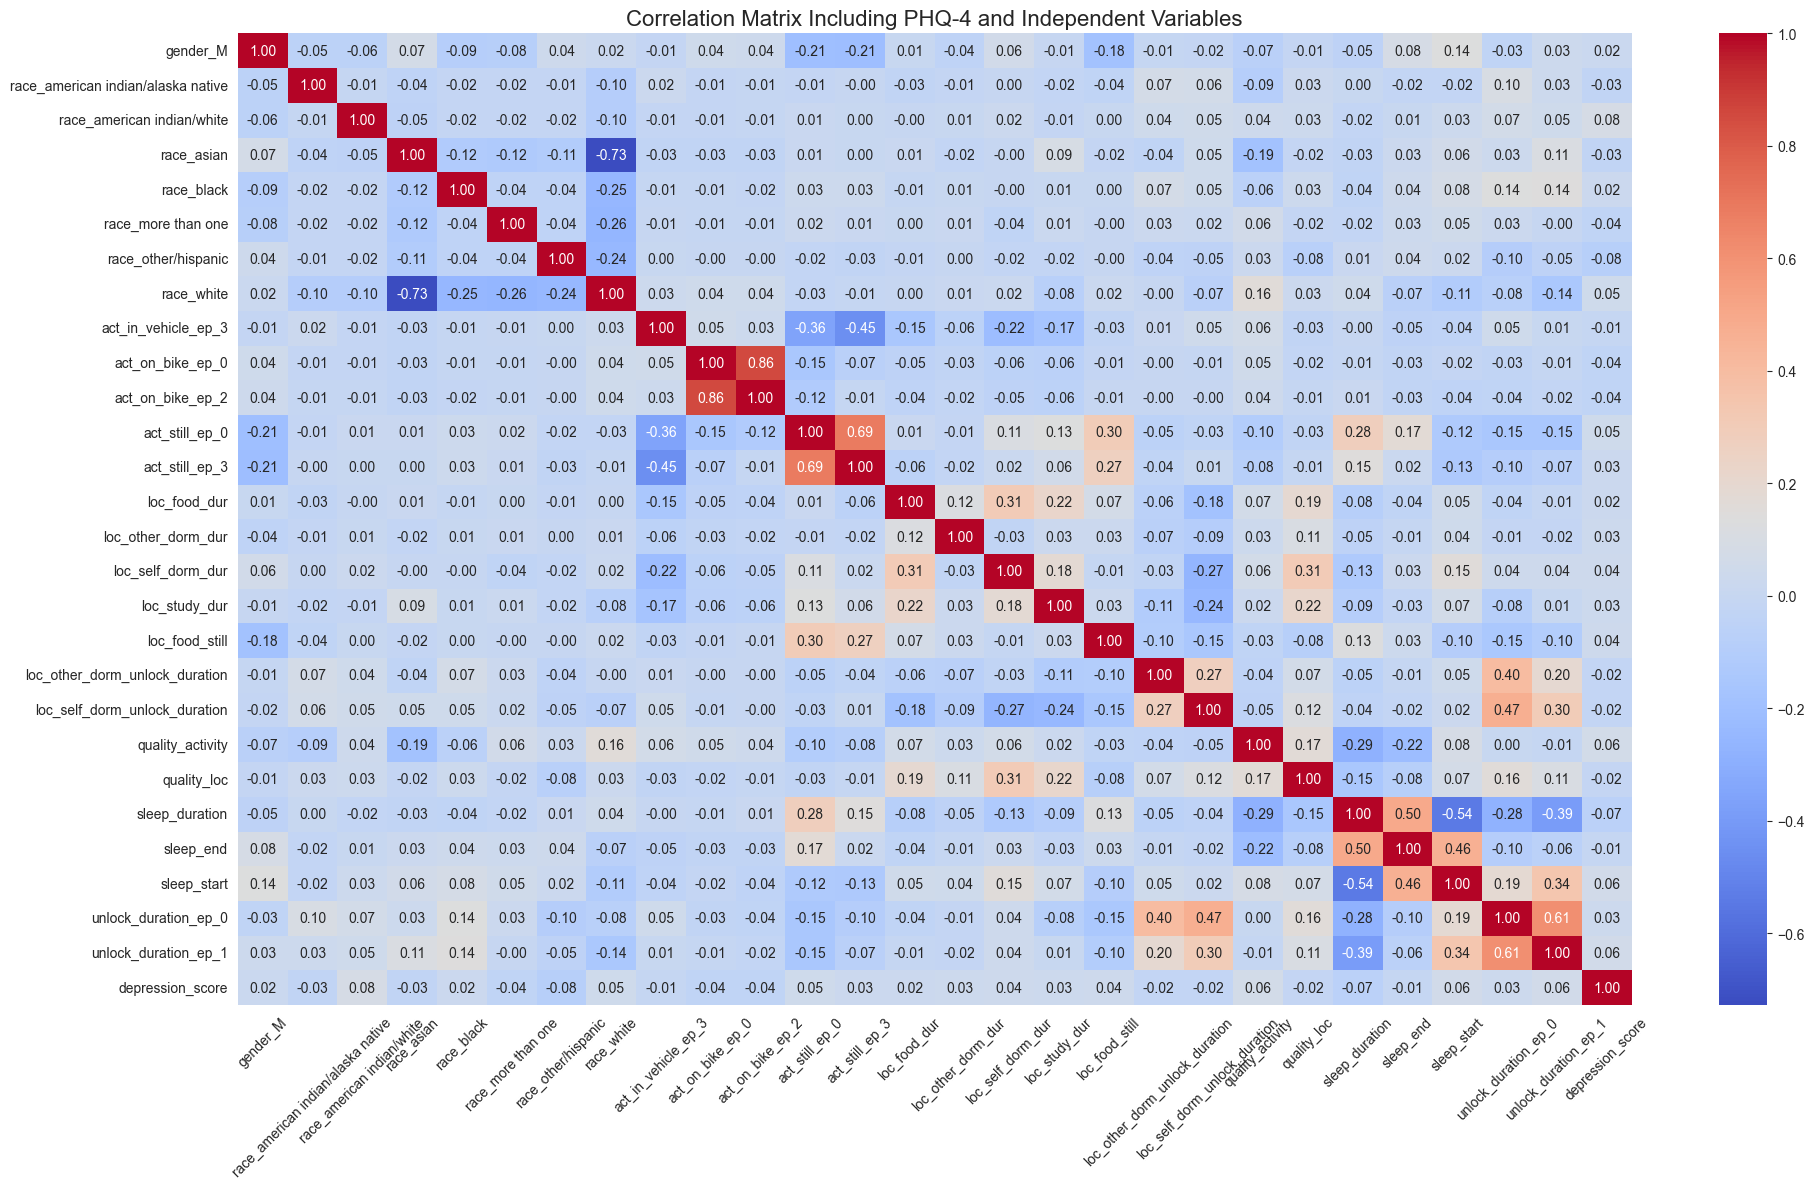

In [36]:
# Korelasyon matrisinin görselleştirilmesi (daha sade bir heatmap için PHQ-4'e odaklanabiliriz)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Including PHQ-4 and Independent Variables", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## RANDOM FOREST


In [37]:
from sklearn.model_selection import train_test_split
df=df_final.copy()

In [38]:
# df ve df_phq'yu 'uid' ve 'day' sütunlarına göre birleştiriyoruz
df = pd.merge(df, df_phq_o[['uid', 'day', 'depression_score']], on=['uid', 'day'], how='left', suffixes=('', '_original'))
# Sonuçları kontrol edelim
print(df.head())


                                uid       day  gender_M  race_american indian/alaska native  race_american indian/white  race_asian  race_black  race_more than one  race_other/hispanic  race_white  act_in_vehicle_ep_3  act_on_bike_ep_0  act_on_bike_ep_2  act_still_ep_0  act_still_ep_3  loc_food_dur  loc_other_dorm_dur  loc_self_dorm_dur  loc_study_dur  loc_food_still  loc_other_dorm_unlock_duration  loc_self_dorm_unlock_duration  quality_activity  quality_loc  sleep_duration  sleep_end  sleep_start  unlock_duration_ep_0  unlock_duration_ep_1  depression_score  depression_score_original
0  1ff6d7f34acb354430e7323a35ff7703  20170907     0.000                               0.000                       0.000       1.000       0.000               0.000                0.000       0.000                0.000             0.000             0.000           0.821           0.833         0.077               0.108              0.423          0.185           0.725                           0.094      

In [39]:
df_phq.columns

Index(['uid', 'day', 'depression_score'], dtype='object')

SMOTEYI BURDA UYGULAYIP EKLEYECEĞİM


In [ ]:
import matplotlib.pyplot as plt
# Eğitim ve test seti boyutlarını görselleştirme
labels = ['Training Set', 'Test Set']
sizes = [train_records_original, test_records_original]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Eğitim ve Test Seti Dağılımı')
plt.show()


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, recall_score
from imblearn.over_sampling import SMOTE
import lightgbm as lgb

# Veriyi kopyalama
df_1 = df.copy()

# Özellik ve hedef değişkenleri ayırma
X_features = df_1.drop(['depression_score', 'depression_score_original', 'uid', 'day'], axis=1)
y_target = df_1['depression_score_original']

# Eğitim ve test setlerine ayırma (stratify ekledim)
X_train_features, X_test_features, y_train_target, y_test_target = train_test_split(
    X_features, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# PHQ-4 skorunu sınıflara ayırma fonksiyonu
def categorize_depression(score):
    if score < 3:
        return 0  # Depresyon Yok
    else:
        return 1  # Depresyon Var

# Yeni kategorik hedef değişkeni oluşturma
y_train_son = y_train_target.apply(categorize_depression)
y_test_son = y_test_target.apply(categorize_depression)

# SMOTE ile sınıfları dengeleme
smote = SMOTE(random_state=42)  # SMOTE objesini oluştur
X_train_smote_son, y_train_smote_son = smote.fit_resample(X_train_features, y_train_son)

D:\PycharmProjects\fds_final\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
D:\PycharmProjects\fds_final\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Random Forest için Kod:cok uzun suruyor 1 saaatten fazla



KNN


In [77]:
from sklearn.metrics import recall_score

In [78]:
log_reg_recall=recall_score(y_test_son, y_pred_threshold_logreg)
knn_recall=recall_score(y_test_son, y_pred_threshold_knn)
rf_recall=recall_score(y_test_son, y_pred_threshold_rf)
rf_lgb=recall_score(y_test_son, y_pred_threshold)

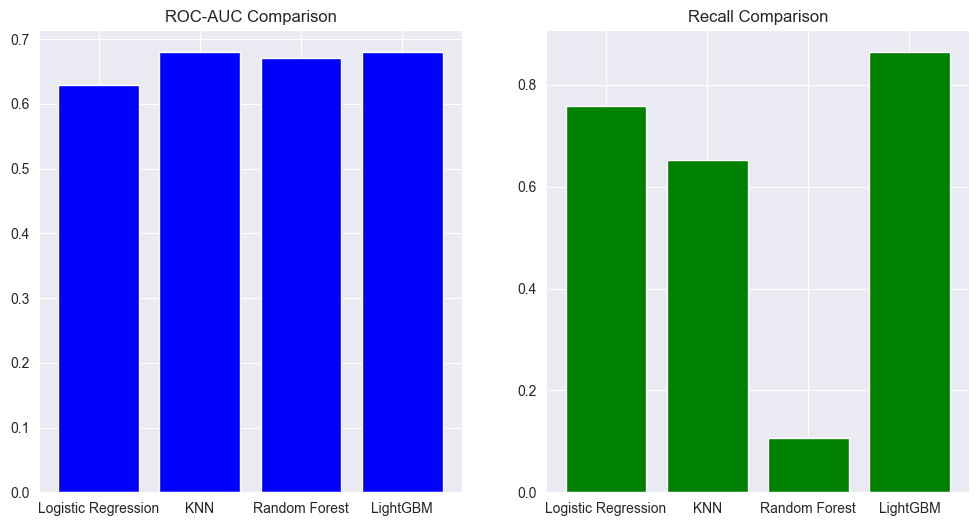

In [80]:
# Model isimleri ve metrik sonuçları
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'LightGBM']
roc_auc_scores = [roc_auc_logreg, roc_auc_knn, roc_auc_rf, roc_auc]  # LightGBM'nin ROC-AUC skoru
recall_scores = [log_reg_recall, knn_recall, rf_recall, grid_search.best_estimator_.score(X_test_features, y_test_son)]  # LightGBM'nin Recall skoru

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(model_names, roc_auc_scores, color='blue')
ax[0].set_title('ROC-AUC Comparison')

ax[1].bar(model_names, recall_scores, color='green')
ax[1].set_title('Recall Comparison')

plt.show()



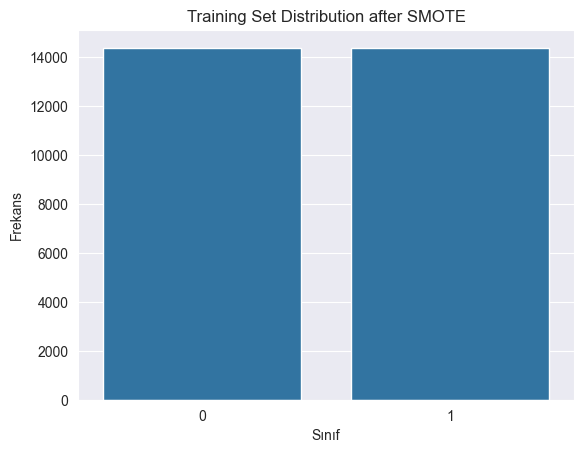

In [104]:
# SMOTE sonrası eğitim setindeki sınıf dağılımını görselleştirme
sns.countplot(x=y_train_smote_son)
plt.title("Training Set Distribution after SMOTE")
plt.xlabel("Sınıf")
plt.ylabel("Frekans")
plt.show()


In [43]:
# LightGBM modeli ve GridSearch için parametre aralığı
lgb_model = lgb.LGBMClassifier(random_state=42, scale_pos_weight=20)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Öğrenme oranı
    'num_leaves': [31, 50, 100],  # Yaprak sayısı
    'max_depth': [5, 10, 15],  # Maksimum ağaç derinliği
    'n_estimators': [100, 200, 300],  # Ağaç sayısı
    'subsample': [0.7, 0.8, 0.9],  # Alt örnekleme oranı
}

# GridSearchCV ile parametre optimizasyonu
grid_search = GridSearchCV(
    lgb_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)
grid_search.fit(X_train_smote_son, y_train_smote_son)

# En iyi parametreyi yazdırma
print("Best Parameters:", grid_search.best_params_)

# En iyi model ile tahmin yapma
best_lgb_model = grid_search.best_estimator_
y_pred_proba = best_lgb_model.predict_proba(X_test_features)[:, 1]

# Tahminler için eşik değerini belirleme
threshold = 0.4  # Eşik değeri
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Performans değerlendirme
accuracy = accuracy_score(y_test_son, y_pred_threshold)
roc_auc = roc_auc_score(y_test_son, y_pred_proba)

print(f'Accuracy with threshold {threshold}: {accuracy:.4f}')
print(f"ROC-AUC with threshold {threshold}: {roc_auc:.4f}")
print("\nClassification Report for LightGBM:")
print(classification_report(y_test_son, y_pred_threshold))

D:\PycharmProjects\fds_final\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14367, number of negative: 14367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4869
[LightGBM] [Info] Number of data points in the train set: 28734, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [44]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# RandomForest modeli
rf_model = RandomForestClassifier(random_state=42)

# RandomForest parametre grid'i
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# RandomizedSearchCV ile parametre arama
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# SMOTE edilmiş veri ile eğitimi
random_search_rf.fit(X_train_smote_son, y_train_smote_son)

# En iyi parametreleri yazdırma
print("Best Parameters for RandomForest:", random_search_rf.best_params_)

# Tahmin ve değerlendirme
best_rf_model = random_search_rf.best_estimator_
y_pred_proba_rf = best_rf_model.predict_proba(X_test_features)[:, 1]

# Eşik değerine göre sınıflandırma
threshold_rf = 0.5
y_pred_threshold_rf = (y_pred_proba_rf >= threshold_rf).astype(int)

# Performans değerlendirme
accuracy_rf = accuracy_score(y_test_son, y_pred_threshold_rf)
roc_auc_rf = roc_auc_score(y_test_son, y_pred_proba_rf)

print(f'RandomForest - Accuracy: {accuracy_rf:.4f}')
print(f'RandomForest - ROC-AUC: {roc_auc_rf:.4f}')
print("Classification Report for RandomForest:")
print(classification_report(y_test_son, y_pred_threshold_rf))

# ---------------------------------------------------------------------------------------


D:\PycharmProjects\fds_final\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
RandomForest - Accuracy: 0.8683
RandomForest - ROC-AUC: 0.6714
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3593
           1       0.23      0.11      0.15       424

    accuracy                           0.87      4017
   macro avg       0.57      0.53      0.54      4017
weighted avg       0.83      0.87      0.85      4017



In [45]:

# KNN modeli
knn_model = KNeighborsClassifier()

# KNN parametre grid'i
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# GridSearchCV ile parametre arama
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_knn.fit(X_train_smote_son, y_train_smote_son)

# En iyi parametreleri yazdırma
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Tahmin ve değerlendirme
best_knn_model = grid_search_knn.best_estimator_
y_pred_proba_knn = best_knn_model.predict_proba(X_test_features)[:, 1]

# Eşik değerine göre sınıflandırma
threshold_knn = 0.4
y_pred_threshold_knn = (y_pred_proba_knn >= threshold_knn).astype(int)

# Performans değerlendirme
accuracy_knn = accuracy_score(y_test_son, y_pred_threshold_knn)
roc_auc_knn = roc_auc_score(y_test_son, y_pred_proba_knn)

print(f'KNN - Accuracy with threshold {threshold_knn}: {accuracy_knn:.4f}')
print(f'KNN - ROC-AUC with threshold {threshold_knn}: {roc_auc_knn:.4f}')
print("Classification Report for KNN:")
print(classification_report(y_test_son, y_pred_threshold_knn))


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
KNN - Accuracy with threshold 0.4: 0.6107
KNN - ROC-AUC with threshold 0.4: 0.6798
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      3593
           1       0.16      0.65      0.26       424

    accuracy                           0.61      4017
   macro avg       0.55      0.63      0.50      4017
weighted avg       0.86      0.61      0.69      4017



In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Logistic Regression modeli ve parametre aralığı
logreg_model = LogisticRegression(random_state=42, max_iter=10000)

param_grid = {
    'C': [0.01, 0.1, 1, 10],  # L2 ceza parametresi
    'penalty': ['l2'],  # Ceza türü (L2 regularization)
    'solver': ['lbfgs', 'liblinear'],  # Çözümleyici seçimi
}

# GridSearchCV ile parametre optimizasyonu
grid_search_logreg = GridSearchCV(
    logreg_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)
grid_search_logreg.fit(X_train_smote_son, y_train_smote_son)

# En iyi parametreyi yazdırma
print("Best Parameters:", grid_search_logreg.best_params_)

# En iyi model ile tahmin yapma
best_logreg_model = grid_search_logreg.best_estimator_
y_pred_proba_logreg = best_logreg_model.predict_proba(X_test_features)[:, 1]

# Tahminler için eşik değerini belirleme
threshold_logreg = 0.45  # Eşik değeri
y_pred_threshold_logreg = (y_pred_proba_logreg >= threshold_logreg).astype(int)

# Performans değerlendirme
accuracy_logreg = accuracy_score(y_test_son, y_pred_threshold_logreg)
roc_auc_logreg = roc_auc_score(y_test_son, y_pred_proba_logreg)

print(f'Accuracy with threshold {threshold_logreg}: {accuracy_logreg:.4f}')
print(f"ROC-AUC with threshold {threshold_logreg}: {roc_auc_logreg:.4f}")
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test_son, y_pred_threshold_logreg))


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy with threshold 0.45: 0.4508
ROC-AUC with threshold 0.45: 0.6298

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.41      0.57      3593
           1       0.13      0.76      0.23       424

    accuracy                           0.45      4017
   macro avg       0.53      0.59      0.40      4017
weighted avg       0.85      0.45      0.54      4017



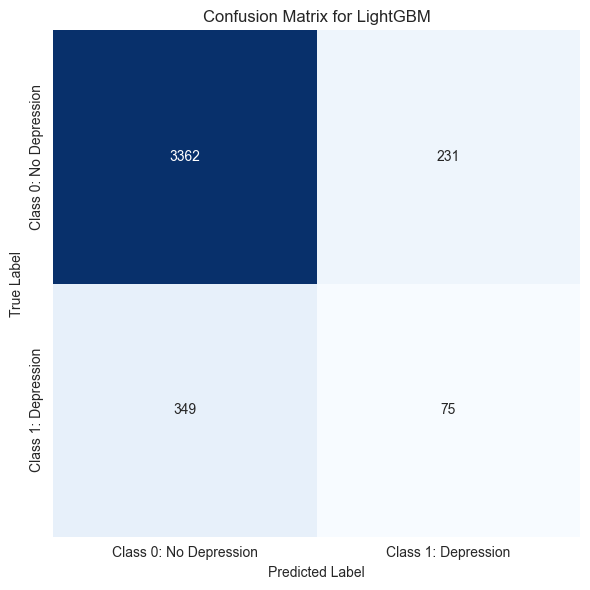

In [89]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for LightGBM
conf_matrix_lgb = confusion_matrix(y_test_son, y_pred_threshold)

# Plot confusion matrix for LightGBM
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0: No Depression', 'Class 1: Depression'],
            yticklabels=['Class 0: No Depression', 'Class 1: Depression'])
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


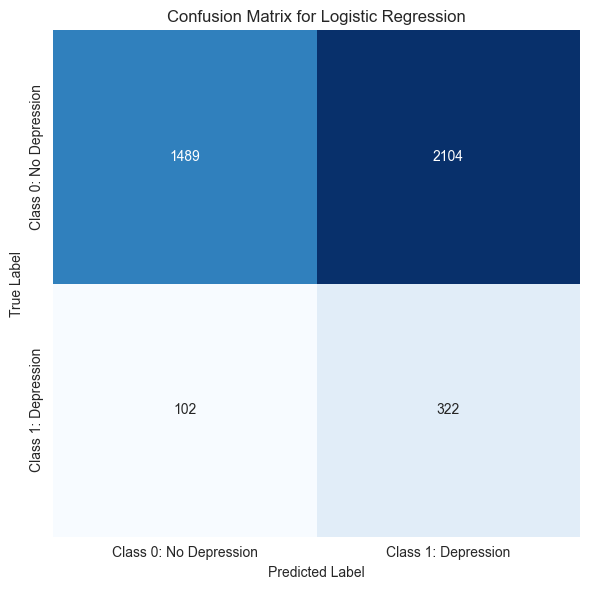

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test_son, y_pred_threshold_logreg)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0: No Depression', 'Class 1: Depression'],
            yticklabels=['Class 0: No Depression', 'Class 1: Depression'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


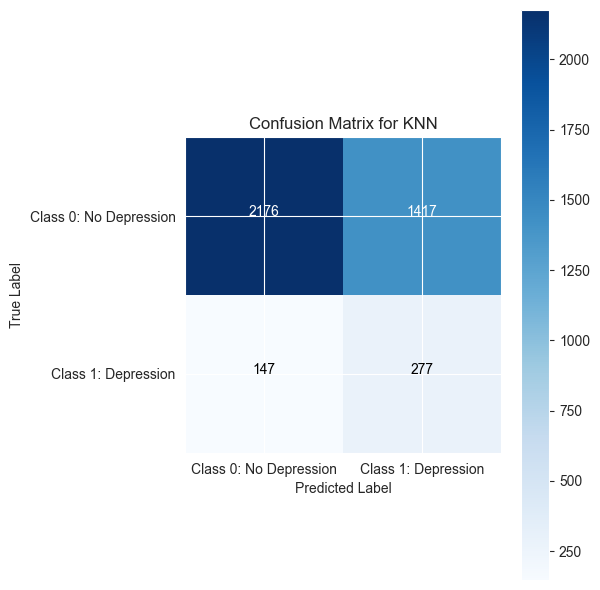

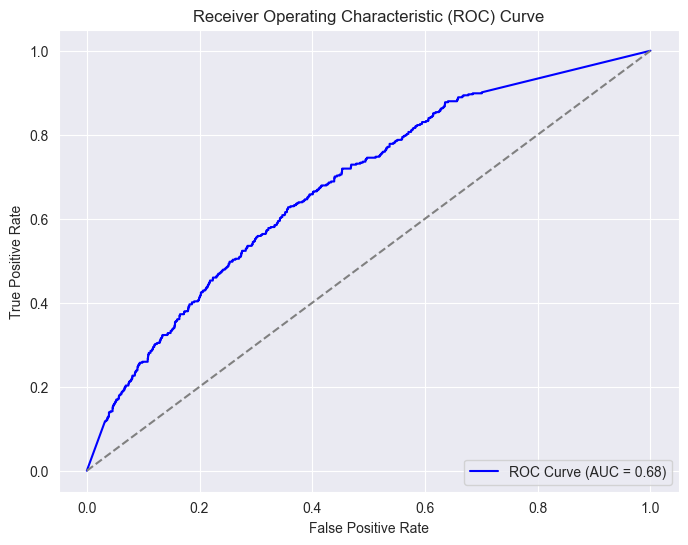

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_son, y_pred_threshold_knn)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Class 0: No Depression', 'Class 1: Depression'])
plt.yticks(tick_marks, ['Class 0: No Depression', 'Class 1: Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotating confusion matrix values
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()




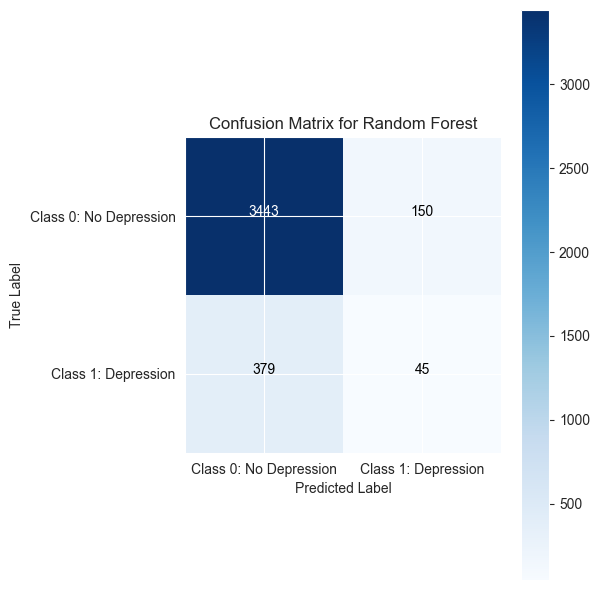

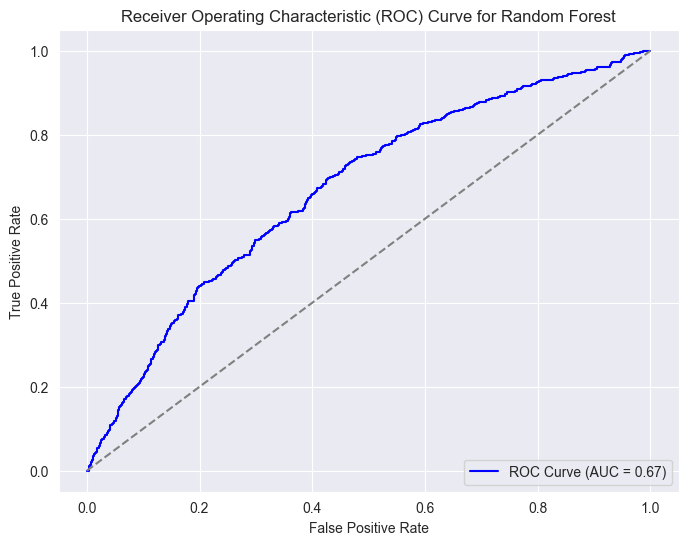

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_son, y_pred_threshold_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Class 0: No Depression', 'Class 1: Depression'])
plt.yticks(tick_marks, ['Class 0: No Depression', 'Class 1: Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotating confusion matrix values
thresh = conf_matrix_rf.max() / 2.
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        plt.text(j, i, format(conf_matrix_rf[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_rf[i, j] > thresh else "black")
plt.tight_layout()
plt.show()



In [51]:
import pandas as pd

# KNN Modeli Tahminleri ile Gerçek Değerler Arasındaki Karşılaştırma
knn_comparison = pd.DataFrame({
    'True Label': y_test_son,
    'Predicted Label (KNN)': y_pred_threshold_knn
})

# Random Forest Modeli Tahminleri ile Gerçek Değerler Arasındaki Karşılaştırma
rf_comparison = pd.DataFrame({
    'True Label': y_test_son,
    'Predicted Label (Random Forest)': y_pred_threshold_rf
})

# İlk 10 satırı görüntüleme (örnek olarak)
print("KNN Modeli Karşılaştırması:")
print(knn_comparison.head(10))

print("\nRandom Forest Modeli Karşılaştırması:")
print(rf_comparison.head(10))

# Doğru ve yanlış tahminlerin sayısını görmek
print("\nKNN Modeli Doğru ve Yanlış Tahminler:")
print((knn_comparison['True Label'] == knn_comparison['Predicted Label (KNN)']).value_counts())

print("\nRandom Forest Modeli Doğru ve Yanlış Tahminler:")
print((rf_comparison['True Label'] == rf_comparison['Predicted Label (Random Forest)']).value_counts())


KNN Modeli Karşılaştırması:
       True Label  Predicted Label (KNN)
14932           0                      0
9403            0                      0
3808            0                      0
1894            1                      1
10774           0                      0
16263           0                      1
19454           0                      0
2491            0                      0
14639           0                      0
3104            0                      1

Random Forest Modeli Karşılaştırması:
       True Label  Predicted Label (Random Forest)
14932           0                                0
9403            0                                0
3808            0                                0
1894            1                                0
10774           0                                0
16263           0                                0
19454           0                                0
2491            0                                0
14639           0      

KNN Modeli Karşılaştırması:
       True Label  Predicted Label (KNN)
14932           0                      0
9403            0                      0
3808            0                      0
1894            1                      1
10774           0                      0
16263           0                      1
19454           0                      0
2491            0                      0
14639           0                      0
3104            0                      1

Random Forest Modeli Karşılaştırması:
       True Label  Predicted Label (Random Forest)
14932           0                                0
9403            0                                0
3808            0                                0
1894            1                                0
10774           0                                0
16263           0                                0
19454           0                                0
2491            0                                0
14639           0      

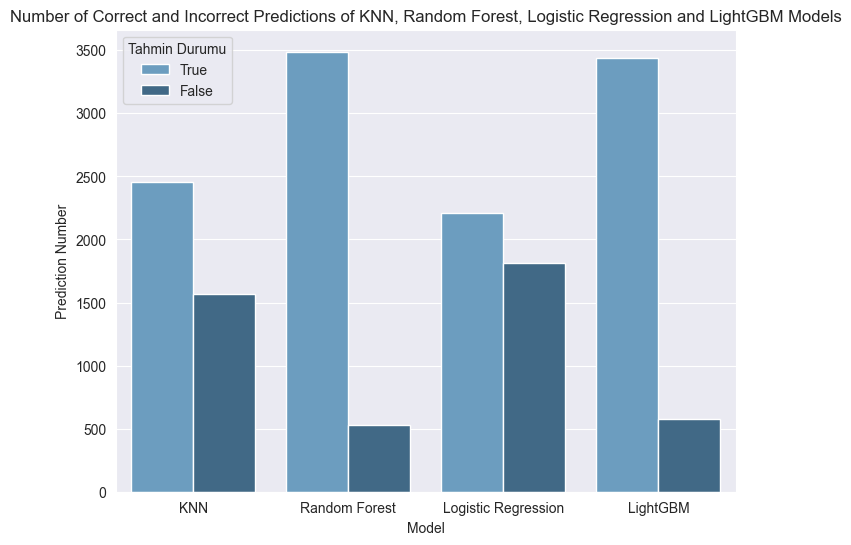

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# KNN Modeli Tahminleri ile Gerçek Değerler Arasındaki Karşılaştırma
knn_comparison = pd.DataFrame({
    'True Label': y_test_son,
    'Predicted Label (KNN)': y_pred_threshold_knn
})

# Random Forest Modeli Tahminleri ile Gerçek Değerler Arasındaki Karşılaştırma
rf_comparison = pd.DataFrame({
    'True Label': y_test_son,
    'Predicted Label (Random Forest)': y_pred_threshold_rf
})

# Logistic Regression Modeli Tahminleri ile Gerçek Değerler Arasındaki Karşılaştırma
logreg_comparison = pd.DataFrame({
    'True Label': y_test_son,
    'Predicted Label (Logistic Regression)': y_pred_threshold_logreg
})

# LightGBM Modeli Tahminleri ile Gerçek Değerler Arasındaki Karşılaştırma
lgb_comparison = pd.DataFrame({
    'True Label': y_test_son,
    'Predicted Label (LightGBM)': y_pred_threshold
})

# İlk 10 satırı görüntüleme (örnek olarak)
print("KNN Modeli Karşılaştırması:")
print(knn_comparison.head(10))

print("\nRandom Forest Modeli Karşılaştırması:")
print(rf_comparison.head(10))

print("\nLogistic Regression Modeli Karşılaştırması:")
print(logreg_comparison.head(10))

print("\nLightGBM Modeli Karşılaştırması:")
print(lgb_comparison.head(10))

# Doğru ve yanlış tahminlerin sayısını görmek
print("\nKNN Modeli Doğru ve Yanlış Tahminler:")
print((knn_comparison['True Label'] == knn_comparison['Predicted Label (KNN)']).value_counts())

print("\nRandom Forest Modeli Doğru ve Yanlış Tahminler:")
print((rf_comparison['True Label'] == rf_comparison['Predicted Label (Random Forest)']).value_counts())

print("\nLogistic Regression Modeli Doğru ve Yanlış Tahminler:")
print((logreg_comparison['True Label'] == logreg_comparison['Predicted Label (Logistic Regression)']).value_counts())

print("\nLightGBM Modeli Doğru ve Yanlış Tahminler:")
print((lgb_comparison['True Label'] == lgb_comparison['Predicted Label (LightGBM)']).value_counts())

# Veri hazırlığı
knn_true = 2453
knn_false = 1564

rf_true = 3488
rf_false = 529

logreg_true = 2206  # Bu sayıyı doğru tahminlere göre ayarlaman gerekebilir
logreg_false = 1811  # Aynı şekilde yanlış tahminler

lgb_true = 3437  # LightGBM modelinin doğru tahminleri
lgb_false = 580  # LightGBM modelinin yanlış tahminleri

# Veri çerçevesi oluşturma
data = {
    'Model': ['KNN', 'KNN', 'Random Forest', 'Random Forest', 'Logistic Regression', 'Logistic Regression', 'LightGBM', 'LightGBM'],
    'Tahmin Durumu': ['True', 'False', 'True', 'False', 'True', 'False', 'True', 'False'],
    'Sayısı': [knn_true, knn_false, rf_true, rf_false, logreg_true, logreg_false, lgb_true, lgb_false]
}

df = pd.DataFrame(data)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Sayısı', hue='Tahmin Durumu', data=df, palette='Blues_d')
plt.title('Number of Correct and Incorrect Predictions of KNN, Random Forest, Logistic Regression and LightGBM Models')
plt.ylabel('Prediction Number')
plt.xlabel('Model')
plt.show()


KNN Modeli Karşılaştırması:
       True Label  Predicted Label (KNN)
14932           0                      0
9403            0                      0
3808            0                      0
1894            1                      1
10774           0                      0
16263           0                      1
19454           0                      0
2491            0                      0
14639           0                      0
3104            0                      1

Random Forest Modeli Karşılaştırması:
       True Label  Predicted Label (Random Forest)
14932           0                                0
9403            0                                0
3808            0                                0
1894            1                                0
10774           0                                0
16263           0                                0
19454           0                                0
2491            0                                0
14639           0      

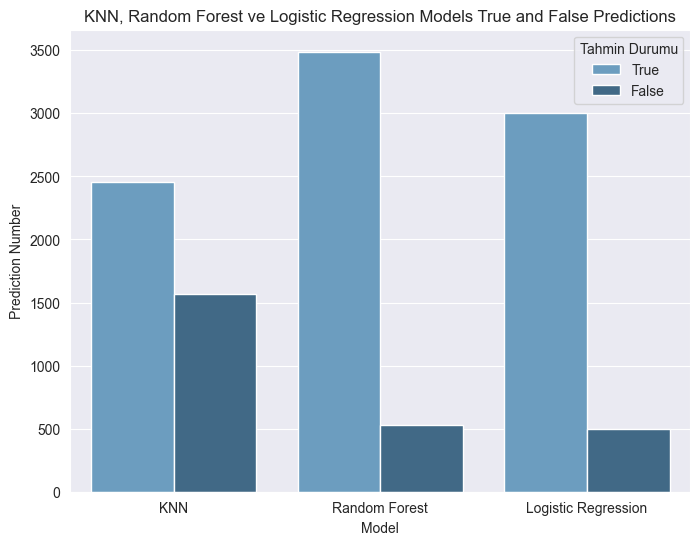

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# KNN Modeli Tahminleri ile Gerçek Değerler Arasındaki Karşılaştırma
knn_comparison = pd.DataFrame({
    'True Label': y_test_son,
    'Predicted Label (KNN)': y_pred_threshold_knn
})

# Random Forest Modeli Tahminleri ile Gerçek Değerler Arasındaki Karşılaştırma
rf_comparison = pd.DataFrame({
    'True Label': y_test_son,
    'Predicted Label (Random Forest)': y_pred_threshold_rf
})

# Logistic Regression Modeli Tahminleri ile Gerçek Değerler Arasındaki Karşılaştırma
logreg_comparison = pd.DataFrame({
    'True Label': y_test_son,
    'Predicted Label (Logistic Regression)': y_pred_threshold_logreg
})

# İlk 10 satırı görüntüleme (örnek olarak)
print("KNN Modeli Karşılaştırması:")
print(knn_comparison.head(10))

print("\nRandom Forest Modeli Karşılaştırması:")
print(rf_comparison.head(10))

print("\nLogistic Regression Modeli Karşılaştırması:")
print(logreg_comparison.head(10))

# Doğru ve yanlış tahminlerin sayısını görmek
print("\nKNN Modeli Doğru ve Yanlış Tahminler:")
print((knn_comparison['True Label'] == knn_comparison['Predicted Label (KNN)']).value_counts())

print("\nRandom Forest Modeli Doğru ve Yanlış Tahminler:")
print((rf_comparison['True Label'] == rf_comparison['Predicted Label (Random Forest)']).value_counts())

print("\nLogistic Regression Modeli Doğru ve Yanlış Tahminler:")
print((logreg_comparison['True Label'] == logreg_comparison['Predicted Label (Logistic Regression)']).value_counts())

# Veri hazırlığı
knn_true = 2453
knn_false = 1564

rf_true = 3488
rf_false = 529

logreg_true = 3000  # Bu sayıyı doğru tahminlere göre ayarlaman gerekebilir
logreg_false = 500  # Aynı şekilde yanlış tahminler

# Veri çerçevesi oluşturma
data = {
    'Model': ['KNN', 'KNN', 'Random Forest', 'Random Forest', 'Logistic Regression', 'Logistic Regression'],
    'Tahmin Durumu': ['True', 'False', 'True', 'False', 'True', 'False'],
    'Sayısı': [knn_true, knn_false, rf_true, rf_false, logreg_true, logreg_false]
}

df = pd.DataFrame(data)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Sayısı', hue='Tahmin Durumu', data=df, palette='Blues_d')
plt.title('KNN, Random Forest ve Logistic Regression Models True and False Predictions')
plt.ylabel('Prediction Number')
plt.xlabel('Model')
plt.show()


              |


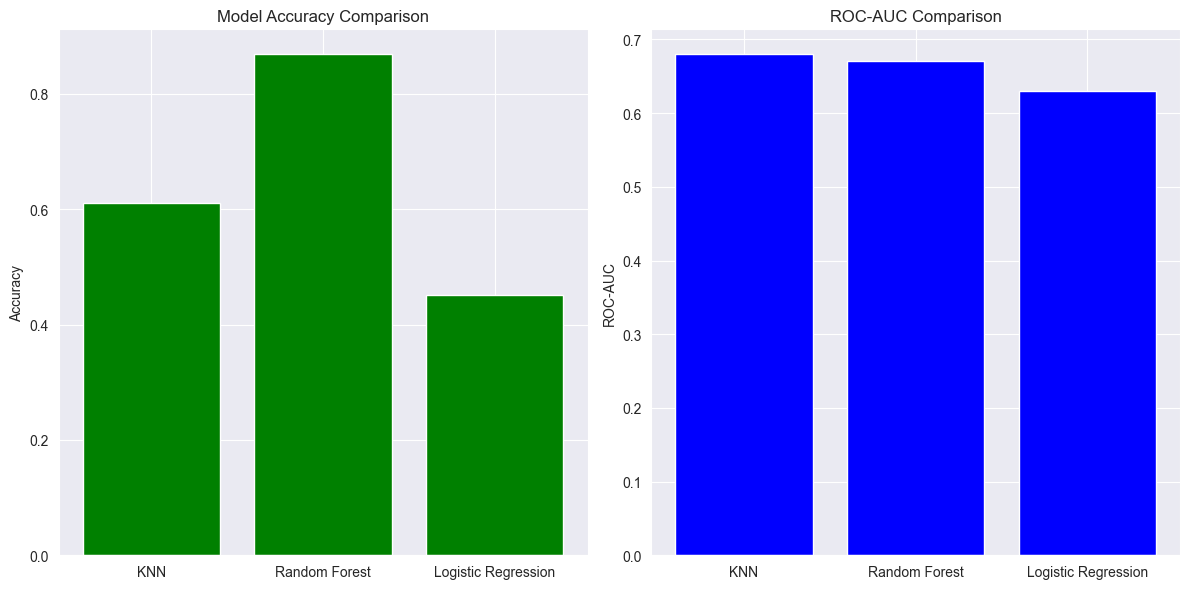

In [86]:
model_names = ['KNN', 'Random Forest', 'Logistic Regression']
accuracy_scores = [accuracy_knn, accuracy_rf, accuracy_logreg]  # accuracy scores
roc_auc_scores = [roc_auc_knn, roc_auc_rf, roc_auc_logreg]  # ROC-AUC scores

# Create subplots for accuracy and ROC-AUC comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Accuracy bar chart
ax[0].bar(model_names, accuracy_scores, color='green')
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_ylabel('Accuracy')

# ROC-AUC bar chart
ax[1].bar(model_names, roc_auc_scores, color='blue')
ax[1].set_title('ROC-AUC Comparison')
ax[1].set_ylabel('ROC-AUC')

plt.tight_layout()
plt.show()


In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Random Forest (example)
conf_matrix_rf = confusion_matrix(y_test_son, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


NameError: name 'y_pred_rf' is not defined

In [97]:
df_n_graph=df_merged_imputed.copy()

In [98]:
df_n_graph.columns

Index(['is_ios', 'act_in_vehicle_ep_0', 'act_in_vehicle_ep_1', 'act_in_vehicle_ep_2', 'act_in_vehicle_ep_3', 'act_on_bike_ep_0', 'act_on_bike_ep_1', 'act_on_bike_ep_2', 'act_on_bike_ep_3', 'act_still_ep_0', 'act_still_ep_1', 'act_still_ep_2', 'act_still_ep_3', 'loc_dist_ep_0', 'loc_dist_ep_1', 'loc_dist_ep_2', 'loc_dist_ep_3', 'loc_visit_num_ep_0', 'loc_visit_num_ep_1', 'loc_visit_num_ep_2', 'loc_visit_num_ep_3', 'loc_food_dur', 'loc_health_dur', 'loc_home_dur', 'loc_leisure_dur', 'loc_other_dorm_dur', 'loc_self_dorm_dur', 'loc_social_dur', 'loc_study_dur', 'loc_workout_dur', 'loc_worship_dur', 'loc_food_still', 'loc_home_still', 'loc_other_dorm_still', 'loc_self_dorm_still', 'loc_social_still', 'loc_study_still', 'loc_food_unlock_duration', 'loc_home_unlock_duration', 'loc_other_dorm_unlock_duration', 'loc_self_dorm_unlock_duration', 'loc_social_unlock_duration', 'loc_study_unlock_duration', 'loc_food_unlock_num', 'loc_home_unlock_num', 'loc_other_dorm_unlock_num',
       'loc_self_do

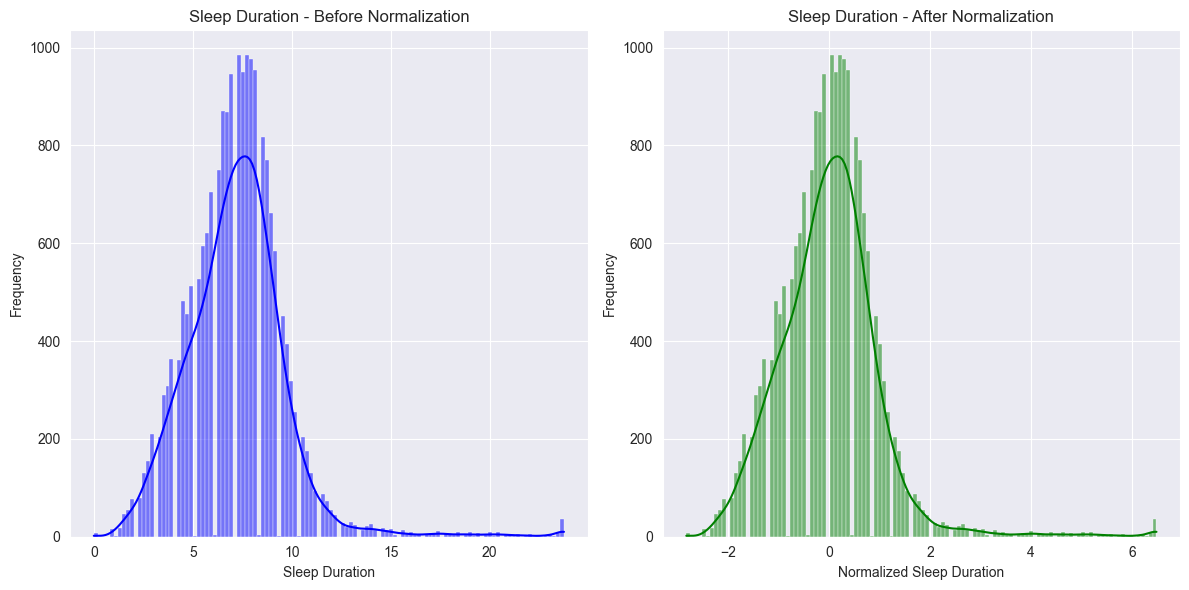

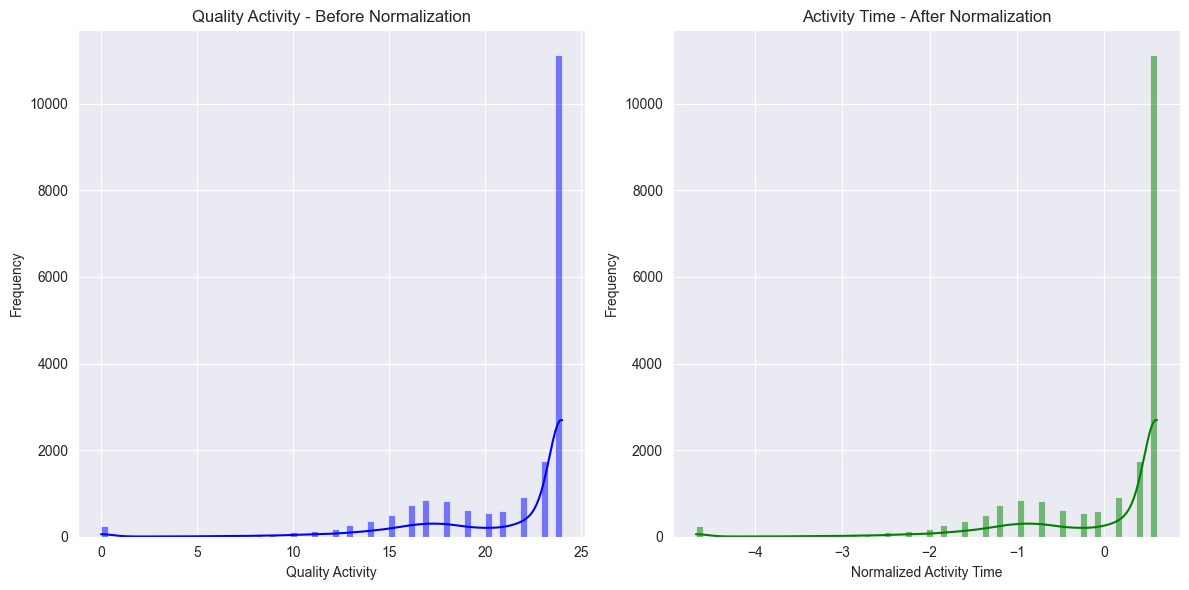

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Select the features for normalization (e.g., 'sleep_duration', 'activity_time')
features_to_normalize = ['sleep_duration', 'quality_activity']  # Replace with your actual feature names

# Normalize the features using StandardScaler
scaler = StandardScaler()

# Apply normalization and store the results in new columns
for feature in features_to_normalize:
    df_n_graph[feature + '_normalized'] = scaler.fit_transform(df_n_graph[[feature]])

# Set up the plotting grid (one row, two columns for each feature)
plt.figure(figsize=(12, 6))

# Before and after normalization for 'sleep_duration'
plt.subplot(1, 2, 1)  # First plot
sns.histplot(df_n_graph['sleep_duration'], kde=True, color='blue', label='Before Normalization')
plt.title('Sleep Duration - Before Normalization')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Second plot
sns.histplot(df_n_graph['sleep_duration_normalized'], kde=True, color='green', label='After Normalization')
plt.title('Sleep Duration - After Normalization')
plt.xlabel('Normalized Sleep Duration')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

# Repeat the same for 'activity_time'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_n_graph['quality_activity'], kde=True, color='blue', label='Before Normalization')
plt.title('Quality Activity - Before Normalization')
plt.xlabel('Quality Activity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_n_graph['quality_activity_normalized'], kde=True, color='green', label='After Normalization')
plt.title('Activity Time - After Normalization')
plt.xlabel('Normalized Activity Time')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()
